In [23]:
install.packages("lubridate")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [6]:
library(dplyr)
library(ggplot2)
library(tidyr)
library(stringr)
library(RColorBrewer)
library(lubridate)

/Users/danielmagalhaes/OneDrive/Ensino/Artigos/UC-RN/Data/Tabelas

In [10]:
setwd("~/OneDrive/Ensino/Artigos/UC-RN")

ucrn = tbl_df( read.csv ("Data/Tabelas/Info_UCRN_2018_v0.csv", header = T, fileEncoding="UTF-8", sep =  ";"))


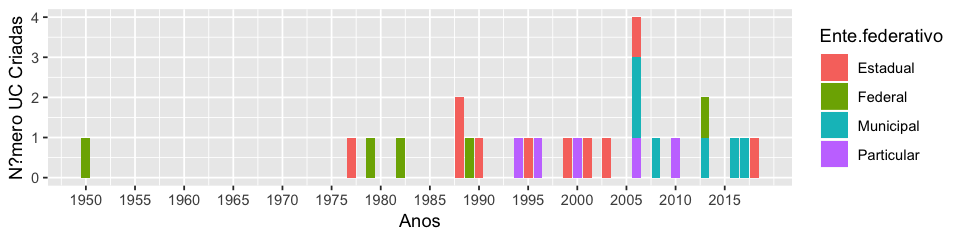

In [21]:
ucrn%>%
  filter (Status == 'Criada', Categoria != 'Outro')%>%
  group_by(ano_criacao, Ente.federativo)%>%
  summarise(n = n())%>%
  ggplot (aes(ano_criacao, y=n, fill= Ente.federativo))+
  geom_bar(stat="identity")+
  scale_x_continuous(breaks=seq(1950, 2017, by = 5))+
  xlab("Anos")+
  ylab("N?mero UC Criadas")

options(repr.plot.width=8, repr.plot.height=2)

Evolução numero UC (Estado, federa, municipios, particulares)

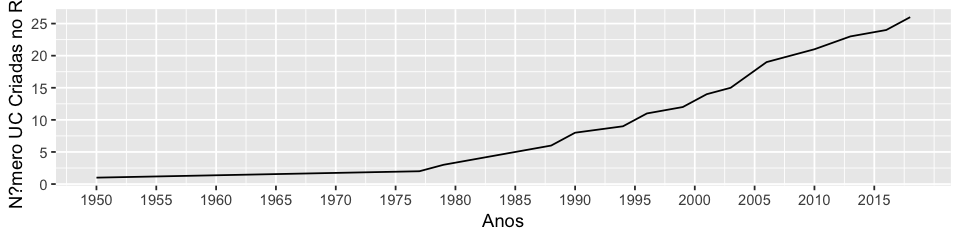

In [22]:
ucrn%>%
  filter (Status == 'Criada', Categoria != 'Outro') %>%
  group_by(ano_criacao)%>%
  summarise(n = n())%>%
  mutate(total = cumsum(n), ano = as.numeric(ano_criacao))%>%
  ggplot (aes(ano_criacao, y=total))+
  geom_line()+
  scale_x_continuous(breaks=seq(1950, 2018, by = 5))+
  scale_y_continuous(breaks=seq(0, 30, by = 5))+
  xlab("Anos")+
  ylab("N?mero UC Criadas no RN")

options(repr.plot.width=8, repr.plot.height=2)

Evolução area UC (Estado, federa, municipios, particulares)

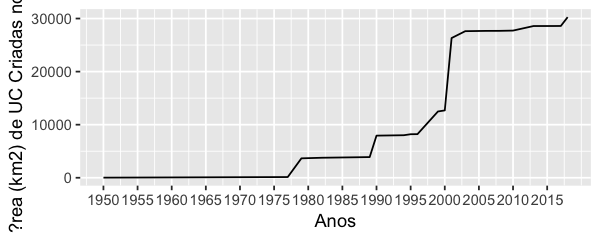

In [20]:

ucrn%>%
  filter (Status == 'Criada', Categoria != 'Outro') %>%
  group_by(ano_criacao)%>%
  summarise(n = sum(A_UC_km))%>%
  mutate(total = cumsum(n), ano = as.numeric(ano_criacao))%>%
  ggplot (aes(ano_criacao, y=total))+
  geom_line()+
  scale_x_continuous(breaks=seq(1950, 2018, by = 5))+
  xlab("Anos")+
  ylab("Área (km2) de UC Criadas no RN")

options(repr.plot.width=8, repr.plot.height=2)

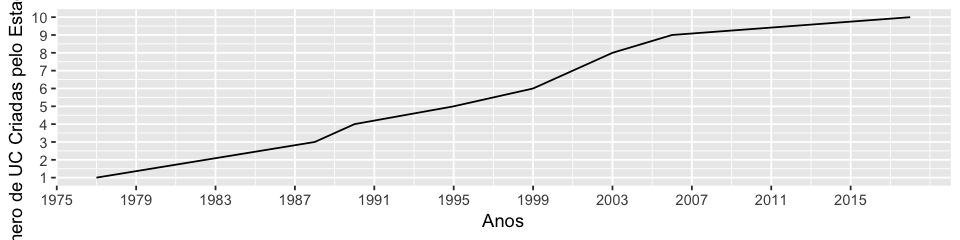

In [24]:
# Evolu??o N?mero UC estado
ucrn%>%
  filter (Ente.federativo == 'Estadual', Status == 'Criada', Categoria != 'Outro') %>%
  group_by(ano_criacao)%>%
  summarise(n = n())%>%
  mutate(total = cumsum(n), ano = as.numeric(ano_criacao))%>%
  ggplot (aes(ano_criacao, y=total))+
  geom_line()+
  scale_x_continuous(breaks=seq(1975, 2018, by = 4))+
  scale_y_continuous(breaks=seq(0, 10, by = 1))+
  xlab("Anos")+
  ylab("N?mero de UC Criadas pelo Estado do RN")

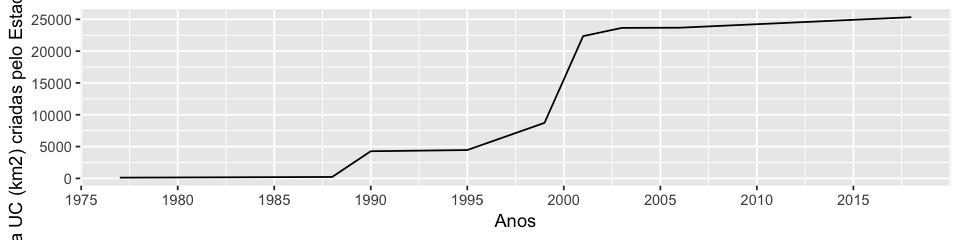

In [25]:
# Evolu??o area UC estado
ucrn%>%
  filter (Ente.federativo == 'Estadual', Status == 'Criada', Categoria != 'Outro') %>%
  group_by(ano_criacao)%>%
  summarise(n = sum(A_UC_km))%>%
  mutate(total = cumsum(n), ano = as.numeric(ano_criacao))%>%
  ggplot (aes(ano_criacao, y=total))+
  geom_line()+
  scale_x_continuous(breaks=seq(1950, 2018, by = 5))+
  xlab("Anos")+
  ylab("?rea UC (km2) criadas pelo Estado do RN")

Warning message:
“funs() is soft deprecated as of dplyr 0.8.0
please use list() instead

# Before:
funs(name = f(.)

# After: 
list(name = ~f(.))
This warning is displayed once per session.”ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'ano' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 

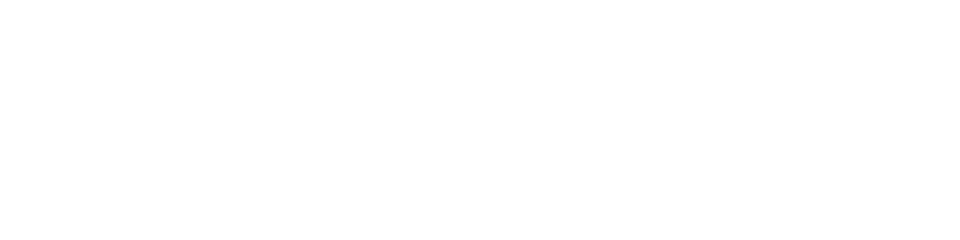

In [26]:
# Evolu??o area por esfera de gest?o - ERROR na hora de agrupar

ucrn%>%
  filter (Status == 'Criada', Categoria != 'Outro') %>%
  group_by(ano_criacao, Ente.federativo)%>%
  summarise(n = sum(A_UC_km))%>%
  spread(ano_criacao, n)%>%
  mutate_if(is.numeric, funs(ifelse(is.na(.),0,.)))%>%
  gather (ano_criacao,n, `1950`:`2018`)%>%
  mutate(total = cumsum(n))%>%
  ggplot (aes(ano, y=total, col=Ente.federativo))+
  geom_line()+
  xlab("Anos")+
  ylab("?rea UC (km)")
